# Suicide Rates On Charts


## Introduction
The dataset was obtained on kaggle.
*This dataset has stats of number of suicides commited in 101 countries from year 1986 to 2016.
the dataset has information age groups, generations commiting suicide which is further categorised into gender i.e. "male" and "female".*

## Dataset


### 1. **Features of dataset**


* **Country** : Country names, a total of 101 countries are considered in this dataset. 
* **Year**: time line from year 1986 to 2016
* **Gender**: sex(male/female)
* **Age**: total of 6 categories based on Age.
* **SuicidesNo**: Total number of suicides 
* **Population**: Population of the resepective country
* **Suicides100kPop**: number of suicides per 100k population.
* **GdpForYear**: Gross Domestic Product.
* **GdpPerCapital**:Obtained by dividing the GDP by the total population of the country for that year
* **Generation**: total of 6 generation are included, based on age and country and gender.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


### 2. Reading The Dataset csv file

In [2]:
suicide_data = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Describing the dataset:
suicide_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### 3. Renaming the columns. 


In [4]:
suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
suicide_data = suicide_data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo',
                          'population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear',
                          'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYear',
                          'gdp_per_capita ($)':'GdpPerCapital','generation':'Generation'})


In [6]:
suicide_data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,GdpForYear,GdpPerCapital,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
suicide_data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'HDIForYear', 'GdpForYear',
       'GdpPerCapital', 'Generation'],
      dtype='object')

 ### 4. Handling the missing values

In [8]:
suicide_data.isnull().sum()

Country                0
Year                   0
Gender                 0
Age                    0
SuicidesNo             0
Population             0
Suicides100kPop        0
CountryYear            0
HDIForYear         19456
GdpForYear             0
GdpPerCapital          0
Generation             0
dtype: int64

Dropping columns countryyear and HDI because HDI column is almost null and we dont need country-year column.


In [9]:
suicide_data = suicide_data.drop(['HDIForYear', 'CountryYear'],axis=1)

In [10]:
suicide_data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYear,GdpPerCapital,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### 5. Data Visualization


**Plotting graph of countries with highest number of suicides**

In [11]:
data = suicide_data.groupby('Country').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)
data = data.head(15)
data

,SuicidesNo
Country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950
Germany,291262
Republic of Korea,261730
Brazil,226613
Poland,139098


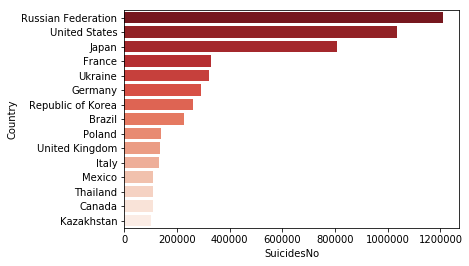

In [12]:
sb.barplot(data['SuicidesNo'],data.index, palette='Reds_r')

A barplot Country Vs SuicideNo

Graph Insights:
1. The countries with highest number of suicides is Russia then comes USA, Japan, France.
2. Number of suicides in Russia and USA are more than 1 million each from 1986 to 2016.
3. Total number of suicide in Russia is equals to total number of suicides in France, Germany and Ukrine.

**Graph of number of suicides commited with respect to gender**

In [13]:
data1 = suicide_data.groupby('Gender').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)
data1 = data1.head(15)

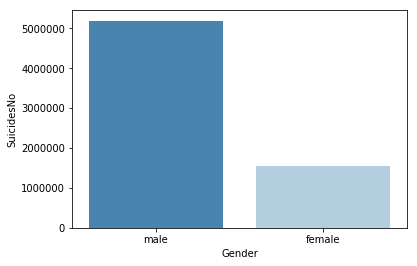

In [14]:
sb.barplot(data1.index, data1['SuicidesNo'], palette='Blues_r')

A Barplot Gender versus SuicideNo

Graph Insights:
1. the highest number of suicides is dominated by males, males tend to commit suicide than females.
2. Number of suicides by Males and females is around 5 million and 1.5 million respectively.

**Graph showing total suicides with respect to Age groups.**

In [15]:
#unique values
pd.unique(suicide_data['Age'])

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [16]:
data2 = suicide_data.groupby('Age').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)
data2

,SuicidesNo
Age,
35-54 years,2452141
55-74 years,1658443
25-34 years,1123912
15-24 years,808542
75+ years,653118
5-14 years,52264


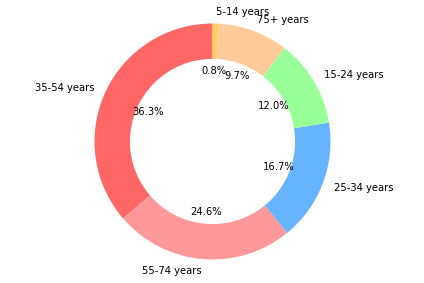

In [17]:
# Pie chart
labels = data2.index
sizes = data2['SuicidesNo']
#colors
colors = ['#ff6666','#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc60']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Pie chart to display suicide percentage rate in various Age groups

Graph Insights:
1. Highest number of suicides are commited by Age group 35-54 years and 55-74 years.
2. Lowest number of suicides : age group "75+" and "5-14" years.

** Total Number Suicides Yearwise**

In [18]:
suicide_data['Year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

In [19]:
data3 = suicide_data.groupby('Year').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)

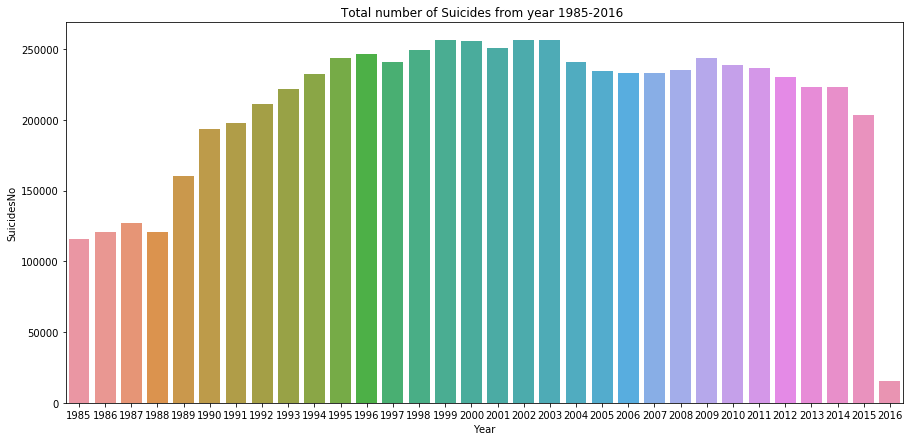

In [20]:
plt.figure(figsize=(15,7))
sb.barplot(data3.index, data3['SuicidesNo'])
plt.title('Total number of Suicides from year 1985-2016 ')
plt.show()

This plot represents total number of suicides over the years.People commiting suicides from 1986 to 2016.

Graph Insights:
1. years 1985,1986,1987,1988 had low suicide rates.
2. highest suicide rate was during 1998 to 2003.
3. 2016 has the least number of suicides.

### Suicide numbers generation wise.

In [21]:
data4 = suicide_data.groupby('Generation').agg({'SuicidesNo':'sum'}).sort_values(by='SuicidesNo', ascending = False)
data4

,SuicidesNo
Generation,
Boomers,2284498
Silent,1781744
Generation X,1532804
Millenials,623459
G.I. Generation,510009
Generation Z,15906


In [22]:
data5 = suicide_data.groupby('Generation').agg({'Suicides100kPop':'sum'}).sort_values(by='Suicides100kPop', ascending = True)
data5.head()

,Suicides100kPop
Generation,
Generation Z,944.18
Millenials,31461.74
G.I. Generation,65708.86
Generation X,67648.45
Boomers,73563.05


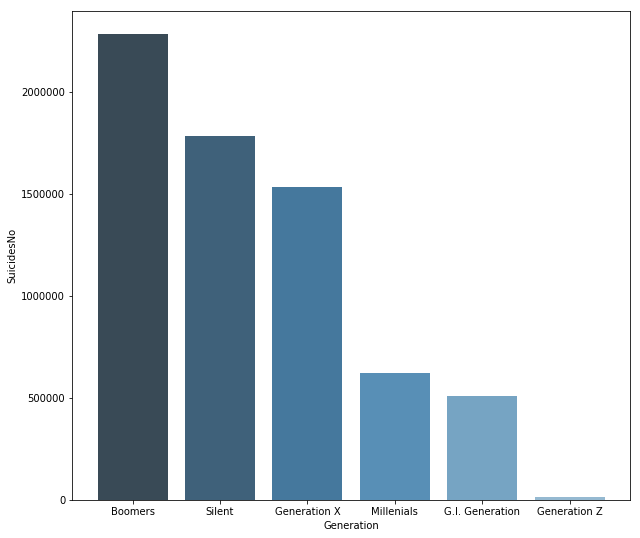

In [23]:
plt.figure(figsize=(10,9))
sb.barplot(data4.index,data4['SuicidesNo'], palette = 'Blues_d')# color = '#ff9449')
#sb.barplot(data5.index,data5['Suicides100kPop'])
plt.plot()
plt.show()

Above plot shows number of suicide death with repect to generation.(Highest to lowest).

Insights from graph:
1. highest number of sucides are by boomers generation and then comes 'silent'.
2. Generation Z barely commit suicides.


In [24]:
data6 = suicide_data.groupby('Generation').agg({'Population':'sum'}).sort_values(by='Population', ascending = True)
data6 
data6['suicides'] = data5.values
data6['suicide_percentage'] = (data6['suicides']/ data6['Population'])*100
data6.sort_values(by='suicide_percentage', ascending = False)

,Population,suicides,suicide_percentage
Generation,,,
Generation Z,2503541842,31461.74,0.001257
Generation X,13472109292,117217.55,0.000870
Silent,9220331647,65708.86,0.000713
Millenials,10649461202,67648.45,0.000635
Boomers,13350511729,73563.05,0.000551
G.I. Generation,2126202724,944.18,0.000044


* The above table displays total population for each generation followed by total number of suicides.
* we can calculate suicide percentage of each generation,
* (suicides / population) * 100
* The sucide percentage shows that generation Z has the highest percentage of suicide deaths.
* G.I generation with the least suicide percentage.

**Population Of Each Generation**

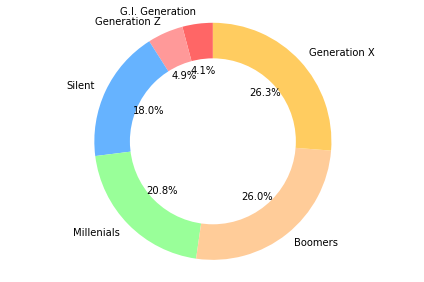

In [25]:
# Pie chart
labels = data6.index
sizes = data6['Population']
#colors
colors = ['#ff6666','#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc60']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

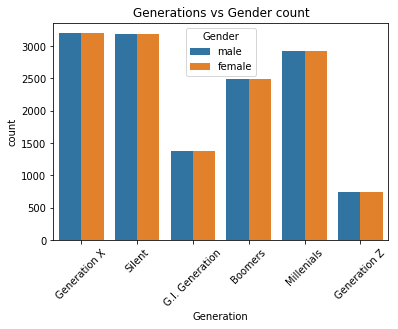

In [26]:
sb.countplot(x='Generation',hue ="Gender",
                 data=suicide_data)
plt.xticks(rotation=45)
plt.title('Generations vs Gender count')
plt.show()

**Pairplots** 

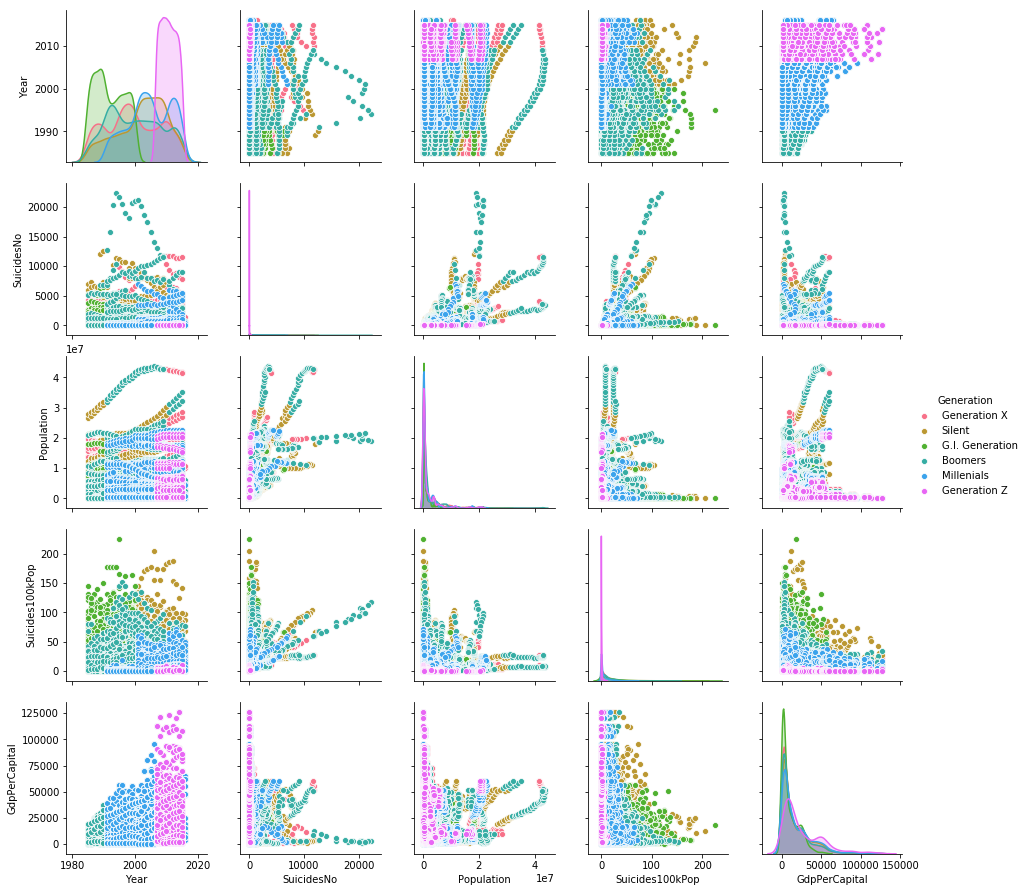

In [27]:
sb.pairplot(suicide_data, hue= "Generation", diag_kind = "kde", kind = "scatter", palette = "husl")
plt.show()

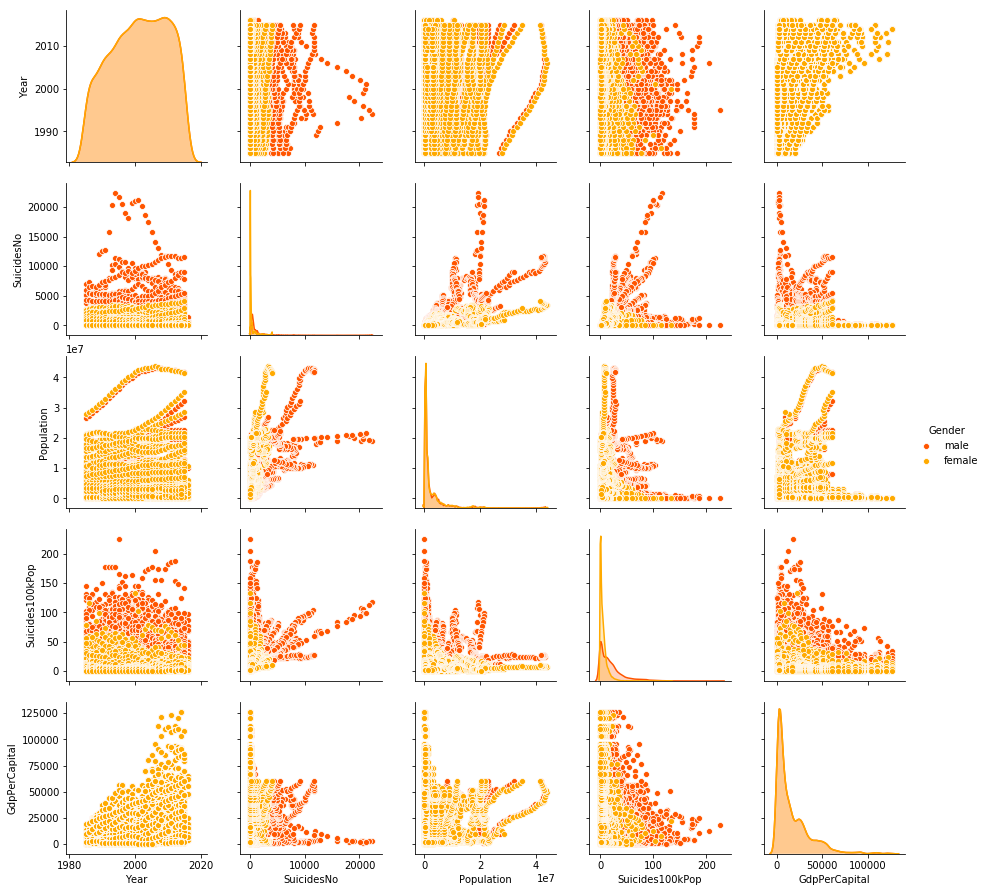

In [28]:
sb.pairplot(suicide_data, hue= "Gender", diag_kind = "kde", kind = "scatter", palette = "autumn")
plt.show()

In [29]:
print('Total population of 101 countries:', suicide_data['Population'].sum())
print('Total number of suicide deaths:', suicide_data['SuicidesNo'].sum())

Total population of 101 countries: 51322158436
Total number of suicide deaths: 6748420


## Conclusion:


* Total suicide deths in all countries from 1986-2016 is: **6748420**
* **Russia** has the highest number of suicide deaths **(1.2 million)** followed by **USA (1 million)**.
* **Males** has highest total number of suicide deaths than **females**. men suicide numbers are **5 million** and women with **1.5 million.**
* **36.3%** of **Age group "34-54"** died due to suicide, most among any age group.
* **2 million boomers** died of suicide, most among the rest of the generations.